# importing all required libraries 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

# loading data set 

In [2]:
loan_data = pd.read_csv('Credit_card_Data_data.csv')
loan_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


# Level 0 analysis 

# finding null values 

In [3]:
loan_data.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

# finding percentage in null values 

In [4]:
(loan_data.isnull().sum() / loan_data.shape[0])*100

SK_ID_CURR              0.000
TARGET                  0.000
NAME_CONTRACT_TYPE      0.000
GENDER                  0.000
Car                     0.000
House                   0.000
CNT_CHILDREN            0.000
AMT_INCOME_TOTAL        0.000
AMT_CREDIT              0.000
AMT_GOODS_PRICE         0.081
NAME_TYPE_SUITE         0.405
NAME_INCOME_TYPE        0.000
NAME_EDUCATION_TYPE     0.000
NAME_FAMILY_STATUS      0.000
DAYS_EMPLOYED           0.000
MOBILE                  0.000
WORK_PHONE              0.000
HOME_PHONE              0.000
MOBILE_REACHABLE        0.000
FLAG_EMAIL              0.000
OCCUPATION_TYPE        31.224
CNT_FAM_MEMBERS         0.001
APPLICATION_DAY         0.000
TOTAL_DOC_SUBMITTED     0.000
dtype: float64

In [5]:
# Here we found to be there are 31 % are having null values in the given data . 
# so we are replacing that with median values 

In [6]:
for i in loan_data.columns:
    mode_val = loan_data[i].mode()[0]
    loan_data[i] = loan_data[i].fillna(mode_val)


In [7]:
loan_data.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

In [8]:
# Here we replaced every null value with mode values

# seperating categorical columns and numerical columns 

In [9]:
cat_columns = list(loan_data.select_dtypes(include='object').columns)
numeric_columns = list(loan_data.select_dtypes(exclude='object').columns)

# finding number of rows and columns in given data 

In [10]:
loan_data.shape

(100000, 24)

In [11]:
# Here we found 100000 rows and 24 columns . 

# finding number of elements in data set

In [12]:
loan_data.size

2400000

In [13]:
# Here we found there are 2400000 elements in the data set 

# Univariate or level - 1 analysis 

# Find out how many customers are repaying the loans on time. 

<Axes: xlabel='TARGET', ylabel='count'>

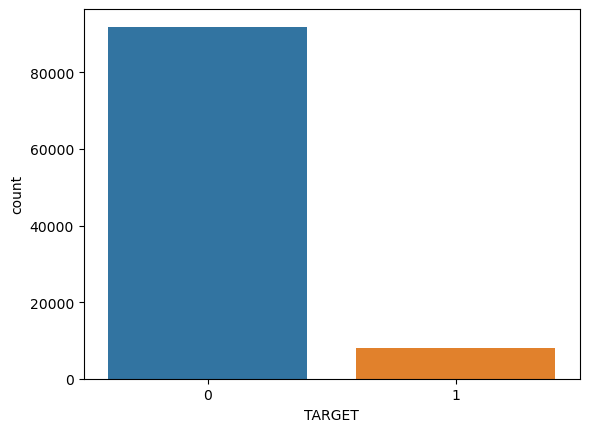

In [14]:
sb.countplot(data=loan_data,x='TARGET')

In [15]:
# Here we found morethan 85000 of the customers paying loans on time and only 10000 customers are not paying loans on 
#correct time

# Display the count of males and females customers who are paying loans on correct time ? 

<Axes: xlabel='GENDER', ylabel='count'>

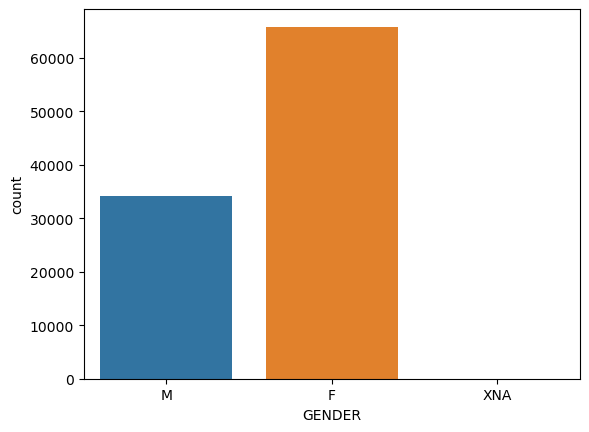

In [16]:
sb.countplot(data=loan_data,x='GENDER')

In [17]:
# Here female employees are repaying the loan on time . The chance of females becoming defaulter is less compared to male 

# Find out in which type of loans the customers are more interested ? 

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

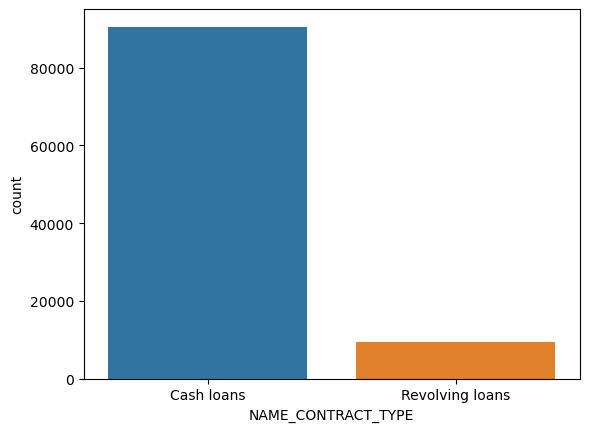

In [18]:
sb.countplot(data=loan_data,x='NAME_CONTRACT_TYPE')

In [19]:
# Here most of them are having cash loans only a few persons are having revolving loans 

# Identify whether a person with car is interested in loans or not ? 

<Axes: xlabel='Car', ylabel='count'>

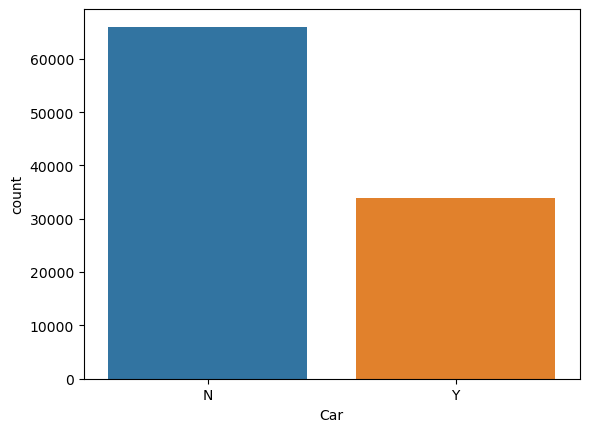

In [20]:
sb.countplot(data=loan_data,x='Car')

In [21]:
# Here most of the persons who is interest in taking loans are not having cars . 

# Identify the number of customers who applied for loans are having own house or not ? 

<Axes: xlabel='House', ylabel='count'>

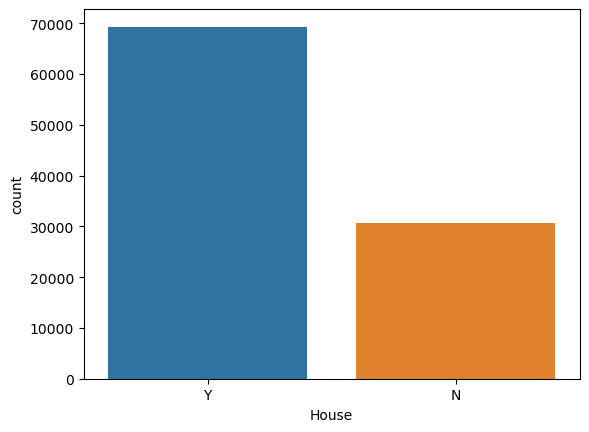

In [22]:
sb.countplot(data=loan_data,x='House')

In [23]:
# Here  majority of the customers are having their personal homes . 

# Display the majority of the children count who are applied for loans ?

<Axes: xlabel='Count', ylabel='CNT_CHILDREN'>

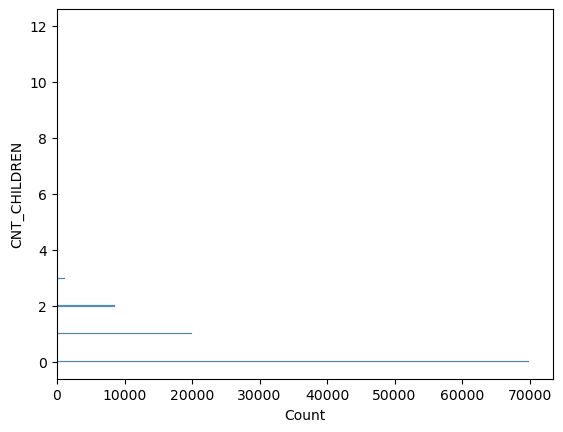

In [24]:
sb.histplot(data=loan_data,y='CNT_CHILDREN')

In [25]:
# Here majority of the customers are not having any children 

# Find out which category of customers are more interested in taking loans ?

<Axes: xlabel='count', ylabel='NAME_TYPE_SUITE'>

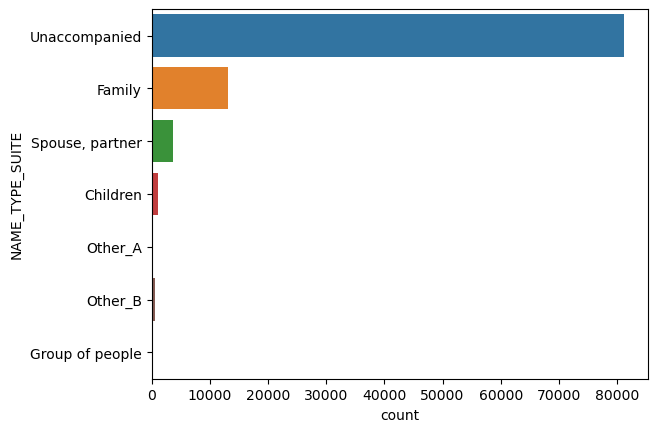

In [26]:
sb.countplot(data=loan_data,y='NAME_TYPE_SUITE')

In [27]:
# Most of the perosons not having any accompanied.They are applying loan singley . 

# Find out the income source of the customers are intersted in loans ? 

<Axes: xlabel='count', ylabel='NAME_INCOME_TYPE'>

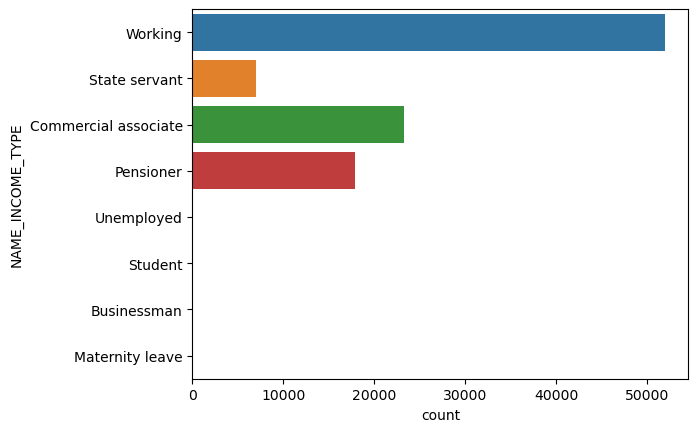

In [28]:
sb.countplot(data=loan_data,y='NAME_INCOME_TYPE')

In [29]:
# Most of them are working who has applied for loans 

In [30]:
# Display the education level of the customers ? 

<Axes: xlabel='count', ylabel='NAME_EDUCATION_TYPE'>

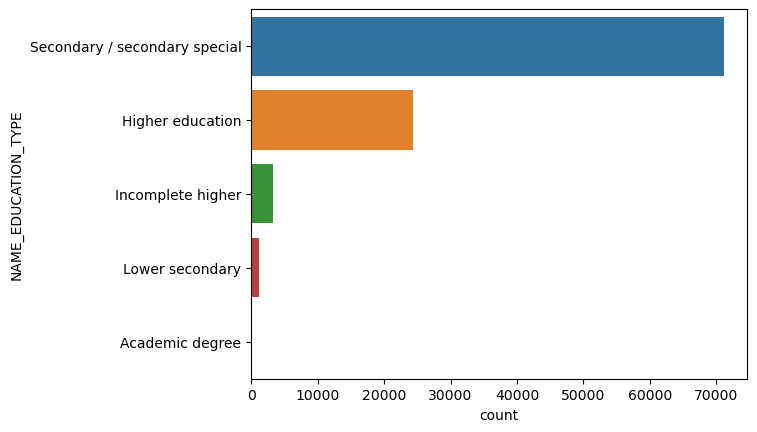

In [31]:
sb.countplot(data=loan_data,y='NAME_EDUCATION_TYPE')

In [32]:
# The highest study of the majority of the clients are secondary education 

# Display the Family status of the customers ?

<Axes: xlabel='count', ylabel='NAME_FAMILY_STATUS'>

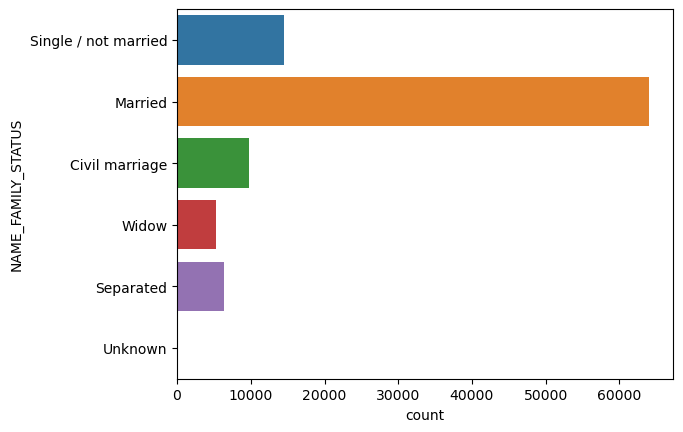

In [33]:
sb.countplot(data=loan_data,y='NAME_FAMILY_STATUS')

In [34]:
# most of the married persons have applied for loans 

In [35]:
# Display the count of employess who are given their mobile numbers ? 

<Axes: xlabel='MOBILE', ylabel='count'>

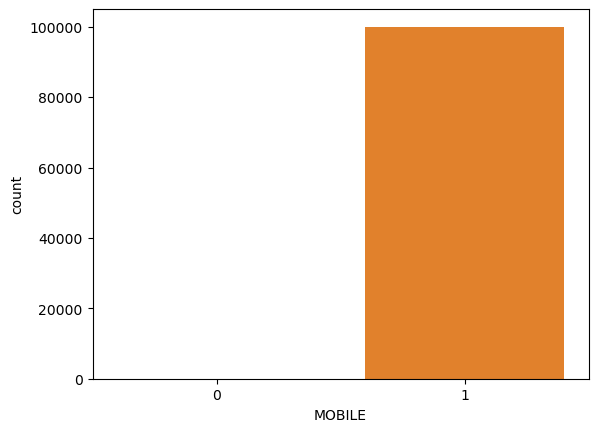

In [36]:
sb.countplot(data=loan_data,x='MOBILE')

In [37]:
# All the clients are providing their mobile numbers 

# Bivariate analsis or level 2 analysis 

In [38]:
# categorical - categorical 

In [39]:
cat_columns

['NAME_CONTRACT_TYPE',
 'GENDER',
 'Car',
 'House',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'APPLICATION_DAY']

# Display the types of loans in which customers are more interested based on gender ? 

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

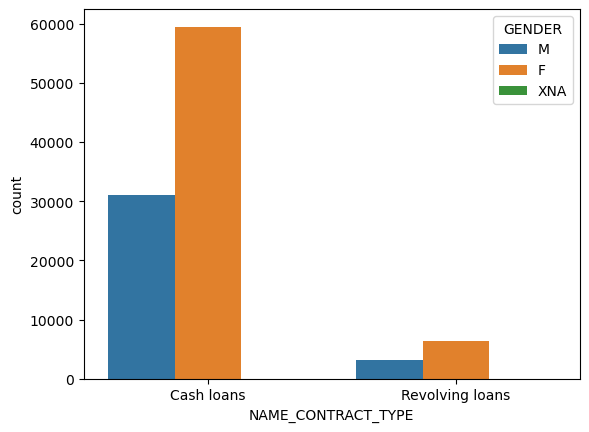

In [40]:
sb.countplot(data=loan_data,x='NAME_CONTRACT_TYPE',hue='GENDER')

In [41]:
# Here females are in more number applyig for loans 

 # Display the count of customers with respect to car based on gender ? 

<Axes: xlabel='Car', ylabel='count'>

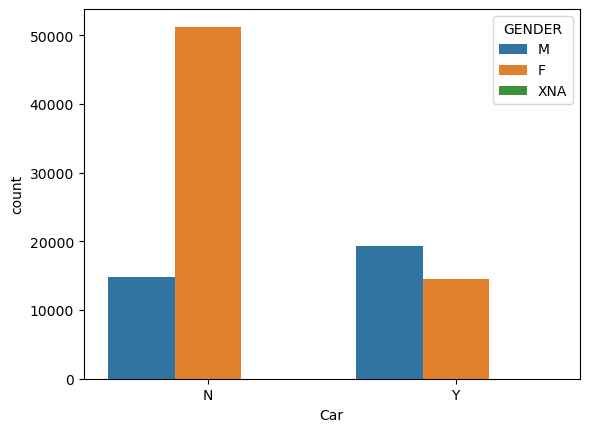

In [42]:
sb.countplot(data=loan_data,x='Car',hue='GENDER')

In [43]:
# Here females are more with no car . 

# Display the count of customers who are having own house with respect to gender ? 

<Axes: xlabel='House', ylabel='count'>

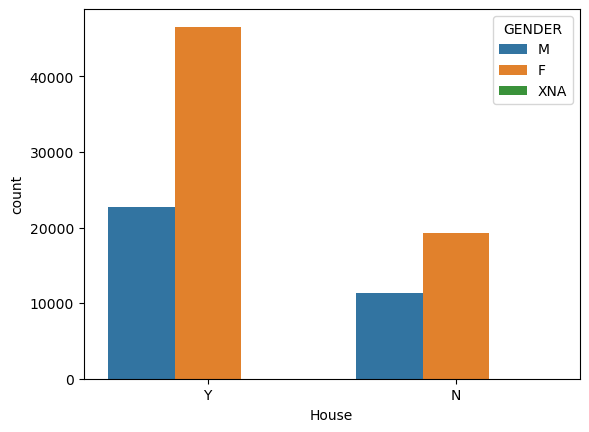

In [44]:
sb.countplot(data=loan_data,x='House',hue='GENDER')

In [45]:
# Here most of the females are having their own homes . 

# Display the type of relationship in customers based on gender ? 

<Axes: xlabel='count', ylabel='NAME_TYPE_SUITE'>

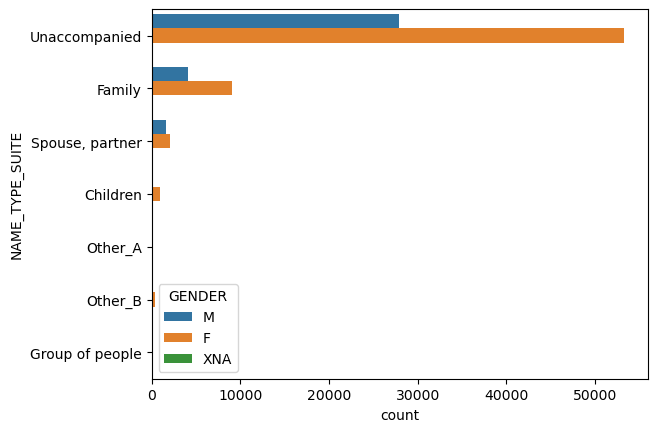

In [46]:
sb.countplot(data=loan_data,y='NAME_TYPE_SUITE',hue='GENDER')

In [47]:
# Here unaccompanied females are more 

# Find the count of customers with respect to income source based on gender ? 

<Axes: xlabel='count', ylabel='NAME_INCOME_TYPE'>

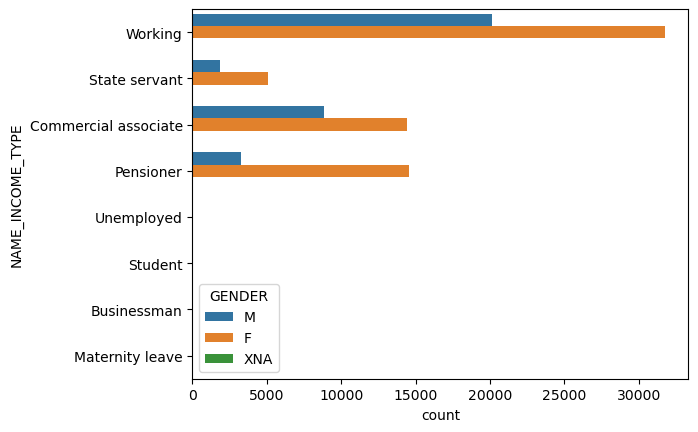

In [48]:
sb.countplot(data=loan_data,y='NAME_INCOME_TYPE',hue='GENDER')

In [49]:
# Here female working clients .

# Find the count of customers with respect to education level based on gender ? 

<Axes: xlabel='count', ylabel='NAME_EDUCATION_TYPE'>

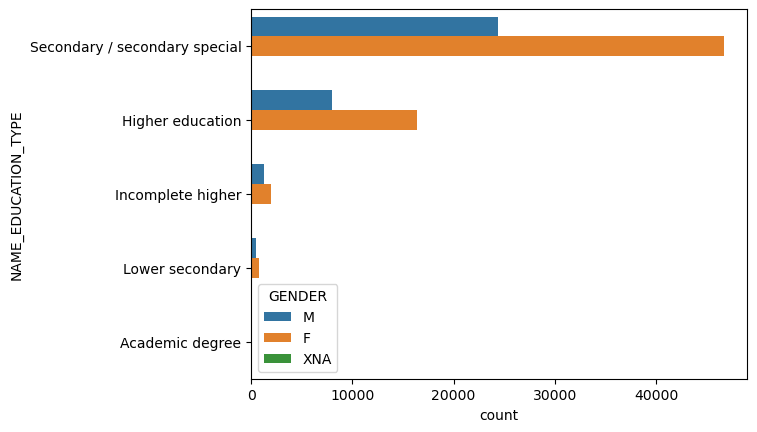

In [50]:
sb.countplot(data=loan_data,y='NAME_EDUCATION_TYPE',hue='GENDER')

In [51]:
# Here females are more with secondary education 

# Display the type of family status that has highest count of customers with respect to genders ? 

<Axes: xlabel='count', ylabel='NAME_FAMILY_STATUS'>

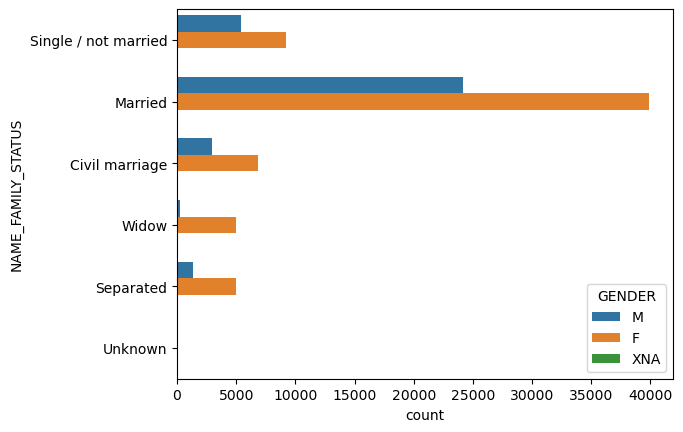

In [52]:
sb.countplot(data=loan_data,y='NAME_FAMILY_STATUS',hue='GENDER')

In [53]:
# Here married female employees are more 

# Display the category with highest count of employees with respect to occupation type based on gender ? 

<Axes: xlabel='count', ylabel='OCCUPATION_TYPE'>

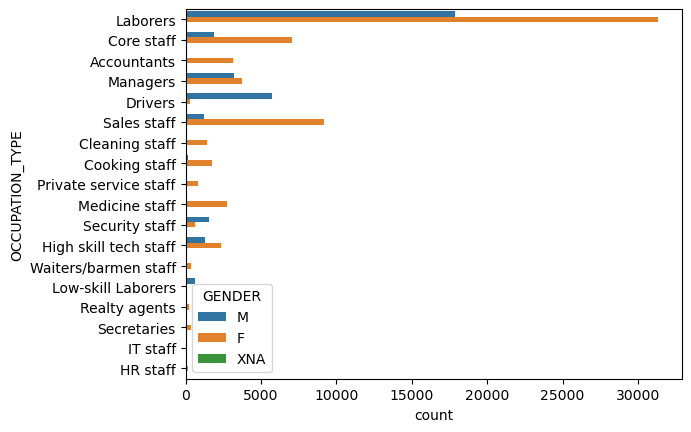

In [54]:
sb.countplot(data=loan_data,y='OCCUPATION_TYPE',hue='GENDER',)

In [55]:
# Here labour females are more . 

# Display the day in which more customers are applying for loans based on gender ? 

<Axes: xlabel='count', ylabel='APPLICATION_DAY'>

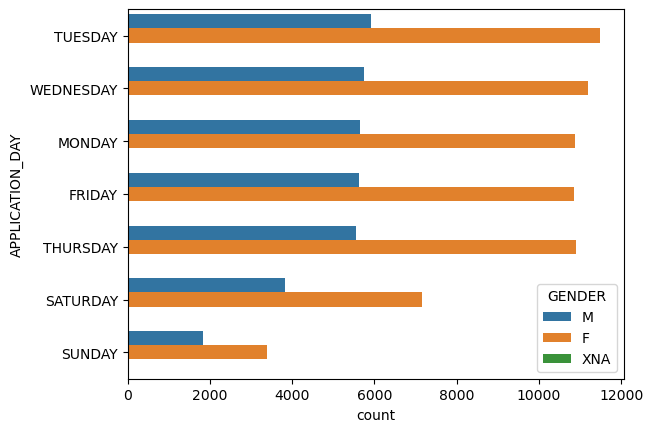

In [56]:
sb.countplot(data=loan_data,y='APPLICATION_DAY',hue='GENDER',order=loan_data.APPLICATION_DAY.value_counts().index)

In [57]:
# cat - num col

In [58]:
numeric_columns

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED',
 'MOBILE',
 'WORK_PHONE',
 'HOME_PHONE',
 'MOBILE_REACHABLE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'TOTAL_DOC_SUBMITTED']

# Find out which gender of customers are repaying loans on time ? 

<Axes: xlabel='TARGET', ylabel='count'>

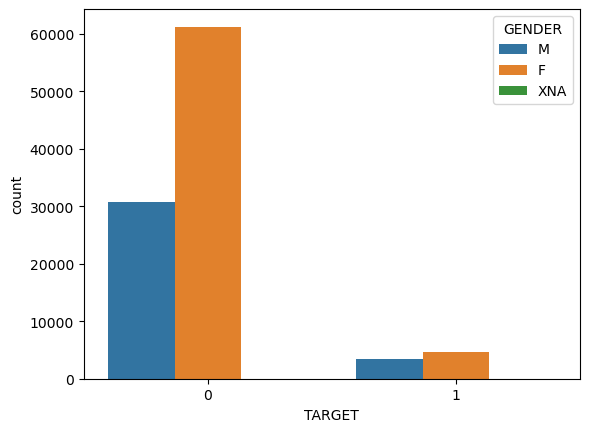

In [59]:
sb.countplot(data=loan_data,x='TARGET',hue='GENDER')

In [60]:
# Here females are paying the loan on the given time . 

# find out the total income of the customers based on gender ? 

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='GENDER'>

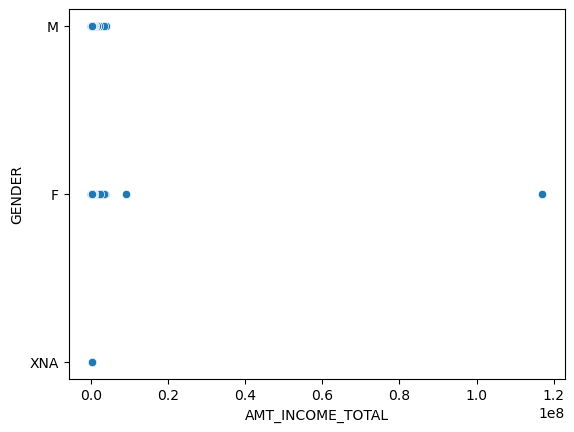

In [61]:
sb.scatterplot(data=loan_data,x='AMT_INCOME_TOTAL',y='GENDER')

In [62]:
# The female customers are having highest income . 

# Display the co-relation between columns ? 

In [63]:
x  = loan_data.corr()

C:\Users\kolla\AppData\Local\Temp\ipykernel_36808\2874957338.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x  = loan_data.corr()


In [64]:
x

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
SK_ID_CURR,1.000000,0.003054,-0.000975,-0.003438,-0.001057,-0.001076,-0.000796,0.003747,0.000821,0.000279,-0.000974,0.004994,-0.001213,0.002248
TARGET,0.003054,1.000000,0.018616,0.004131,-0.031232,-0.040309,-0.043367,0.000938,0.044348,0.026184,0.002675,-0.002348,0.007309,0.014576
CNT_CHILDREN,-0.000975,0.018616,1.000000,0.010435,0.004778,0.000156,-0.239881,0.001831,0.240725,0.056686,0.002135,0.024855,0.879505,-0.014590
AMT_INCOME_TOTAL,-0.003438,0.004131,0.010435,1.000000,0.097095,0.098528,-0.040501,0.000358,0.040384,-0.012115,-0.006865,0.023179,0.012757,0.008671
AMT_CREDIT,-0.001057,-0.031232,0.004778,0.097095,1.000000,0.986688,-0.067421,0.002520,0.066010,-0.023368,0.022200,0.013612,0.064732,0.209800
AMT_GOODS_PRICE,-0.001076,-0.040309,0.000156,0.098528,0.986688,1.000000,-0.064687,0.002452,0.063239,-0.001165,0.019338,0.013942,0.062245,0.179571
DAYS_EMPLOYED,-0.000796,-0.043367,-0.239881,-0.040501,-0.067421,-0.064687,1.000000,0.001428,-0.999648,-0.233128,0.015076,-0.063137,-0.231273,0.012632
MOBILE,0.003747,0.000938,0.001831,0.000358,0.002520,0.002452,0.001428,1.000000,-0.001475,0.001580,-0.000142,0.000772,0.000542,-0.009827
WORK_PHONE,0.000821,0.044348,0.240725,0.040384,0.066010,0.063239,-0.999648,-0.001475,1.000000,0.232989,-0.015107,0.063611,0.231616,-0.013161
HOME_PHONE,0.000279,0.026184,0.056686,-0.012115,-0.023368,-0.001165,-0.233128,0.001580,0.232989,1.000000,0.022421,-0.006228,0.067909,0.025092


<Axes: >

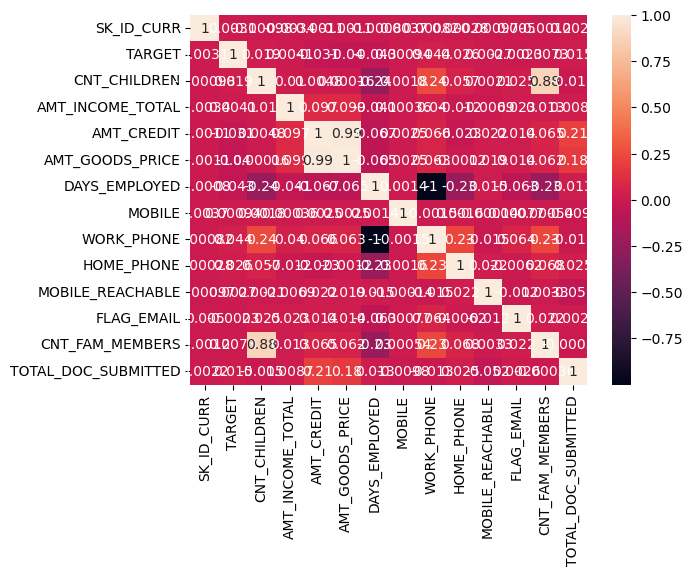

In [65]:
sb.heatmap(data=x,annot=True)

In [66]:
loan_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [67]:
loan_data['TARGET'].corr(loan_data['CNT_FAM_MEMBERS'])

0.007308520496565024

# Observations 

In [68]:
# 1.Female customers are repaying their loans on correct time 
# 2.Most of the customers are interested in cash loans . 
# 3.There are more number of customers without cars and with own house. 
# 4.The most number of customers are unaccompanied 
# 5.The income source of majority customers are working . 
# 6.Secondary education is the highest education level of majority of the customers .
# 7.Married persons are mostly applying for loans . 

# conclusion
The females with no car , having an personal home with unaccompanied working
And having secondary education  who is married and working as a labour is having a less probability of becoming a defaulter . 
So if the firm would provide loans to the above category then the firm may increase their business and chance of losing money will be less.   
